# Coursera - perform-exploratory-data-analysis-on-retail-data-with-python

## Import data

In [51]:
import pandas as pd
import numpy as np
# !pip install openpyxl
# !pip install pyarrow
# import sys 
# !{sys.executable} -m pip install openpyxl
# !{sys.executable} -m pip install matplotlib

In [62]:
df = pd.read_excel('~/Workspace/jupyter-01-test/Online Retail.xlsx')
df_backup = df.copy()

# Data cleanup

In [269]:
# Duplicates
df[df.duplicated()].shape

(5268, 13)

In [268]:
# NA values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Total               0
Year-Month          0
DayOfWeek           0
DayOfMonth          0
dtype: int64

In [270]:
# Outliers

# IRQ method
q1=df['Total'].quantile(0.25)

q3=df['Total'].quantile(0.75)

IQR=q3-q1

outliers = df[((df['Total']<(q1-1.5*IQR)) | (df['Total']>(q3+1.5*IQR)))]

outliers.shape

(44997, 13)

## Impact

There are 5k duplicates. Determine if this is intended behaviour or delete. ( less than 1% impact )

135k invoices are missing CustomerID. Determine if we want to include those in the analysis. ( 25% of data )

Using IRQ method we have isolated 45k outliers. ( 10% of the data) They will be included in the analysis but we will want to idently the big spenders. Also we might want to exclude outliers when analyising typicall customer. We should also use other methods of detecting outliers.

# 1. Timeframe

**01-Dec-2010** to **09-Dec-2011**.

# 2. Most successfull year

<Axes: title={'center': 'Sales volume'}, xlabel='(M)', ylabel='Year'>

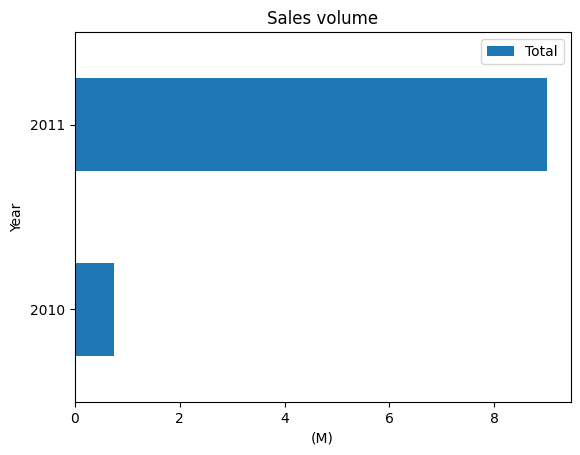

In [220]:
df['Year'] = df['InvoiceDate'].dt.year
df['Total'] = df['UnitPrice'] * df['Quantity']

# Total sales volume
sales_volume = df.loc[:,['Total','Year']].groupby('Year').sum() / 1_000_000
sales_volume

sales_volume.plot(kind="barh", 
                  title='Sales volume',
                  xlabel="(M)")

We can't say with 100% certanty because we don't have the data for the 2010. 

Educated guess: judging only on the performance for Decembers of both years we can see that the first 9 days of 2011 accomplished more than 50% of 2010s' revenue. 2011 is approimately 30% better. (we should extrapolate resto of the 2011 month daily sales proportionally to 2010s to see how much better 2011 really is)

# 3. Monthly performance

<Axes: title={'center': 'Total sales volume'}, xlabel='In thousands'>

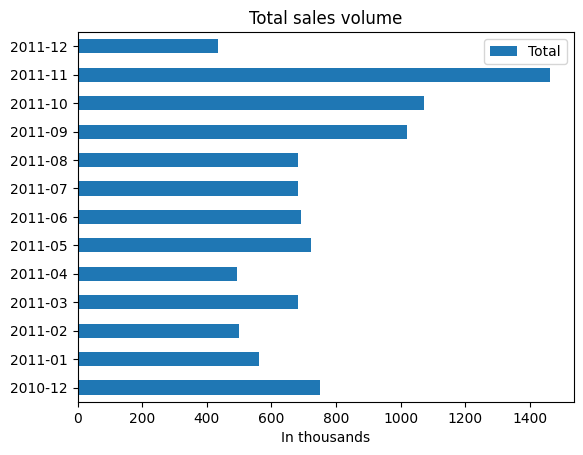

In [126]:
# Sales volume per month (in 1000)
sales_per_month = df.loc[:,['Total','Year-Month']].groupby('Year-Month').sum() / 1_000
sales_per_month.plot.barh(xlabel='In thousands',
                          ylabel='',
                         title='Total sales volume')

## 2011 Quarterly performance

<Axes: title={'center': '2011 quarterly performance'}, xlabel='Quarter', ylabel='In thousands'>

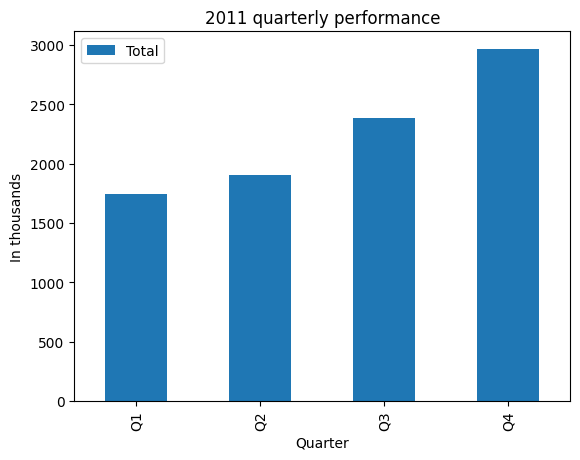

In [257]:
# 2011 by quartals (in 1000)

sales_per_quarter = df[(df['InvoiceDate'].dt.year == 2011)].loc[:, ['Total', 'InvoiceDate']].copy()
sales_per_quarter['Quarter'] = "Q" + sales_per_quarter['InvoiceDate'].dt.quarter.apply(str)
del (sales_per_quarter['InvoiceDate'])
sales_per_quarter


(sales_per_quarter.groupby('Quarter').sum() / 1_000).plot.bar(ylabel='In thousands',
                                                               xlabel='Quarter',
                                                               title='2011 quarterly performance')

# 4. Monthly performance year-to-year

There's too little data to tell, we only have december overlap partially.
We can't take into account December 2011 because we don't have data for the full month.

# 5. Weekly performance

Answering this question will not yead us meaningfull insight right now.

# 6. Daily performance?
Analysis can be done either by item quantity or total sales volume. We're focusing on sales volume.
## 6.1. Day of week

In [135]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
day_of_week_avg = df[['Total', 'DayOfWeek']].groupby('DayOfWeek').mean()
day_of_week_avg.sort_values(by='Total', ascending=False)

#df['InvoiceDate'].dt.dayofweek.value_counts()

,Total
DayOfWeek,
3,20.340651
1,19.312655
4,18.743820
2,18.338148
0,16.702689
6,12.515400


## 6.2. Day of month

<Axes: title={'center': 'Average sales volume per day'}, xlabel='Day in month', ylabel='Sale average'>

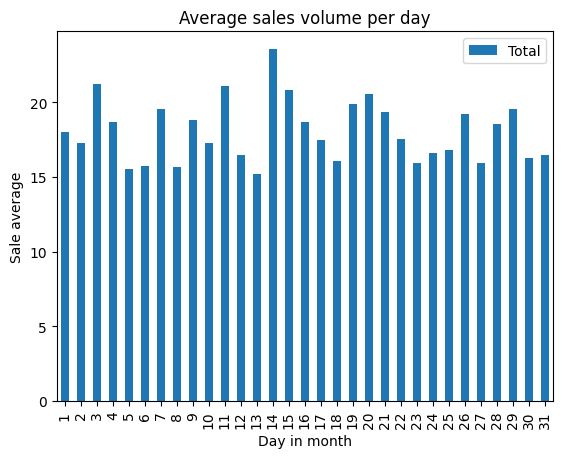

In [272]:
# df['InvoiceDate'].dt.daysinmonth
df['DayOfMonth'] = df['InvoiceDate'].dt.day
day_of_month_avg = df[['Total', 'DayOfMonth']].groupby('DayOfMonth').mean()
#day_of_month_avg.sort_values(by='Total', ascending=False)
day_of_month_avg.plot.bar(title='Average sales volume per day',
                         ylabel='Sale average',
                             xlabel='Day in month')

<Axes: title={'center': 'Average sales volume per day'}, xlabel='Day in month', ylabel='Sale average'>

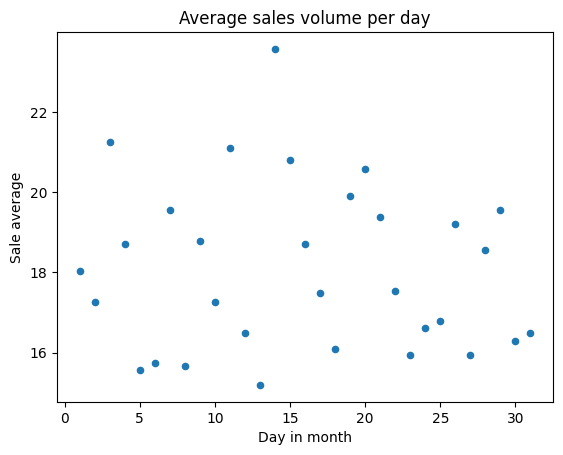

In [273]:
day_of_month_avg
day_of_month_avg['DayOfMonth'] = day_of_month_avg.index
day_of_month_avg.plot.scatter(title='Average sales volume per day', 
                              x='DayOfMonth', 
                              y='Total',
                              ylabel='Sale average',
                              xlabel='Day in month')

There is no significant time of the month where sales are higher than average.

# 7. Koji su proizvodi najuspjesniji?

<Axes: title={'center': 'Most successfull products'}, xlabel='StockCode', ylabel='Total sales volume'>

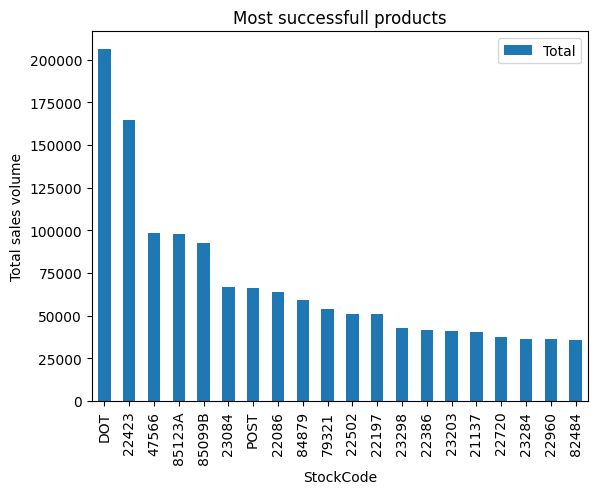

In [164]:
top20_products = df.loc[:, ['StockCode', 'Quantity','Total']].groupby(by='StockCode').sum().sort_values(by='Total', ascending=False).head(20)
top20_products.plot.bar(y='Total',
                       title='Most successfull products',
                       ylabel='Total sales volume')

# 8. Top performing countries

<Axes: title={'center': 'Top countries'}, xlabel='Country', ylabel='Total sales volume (M)'>

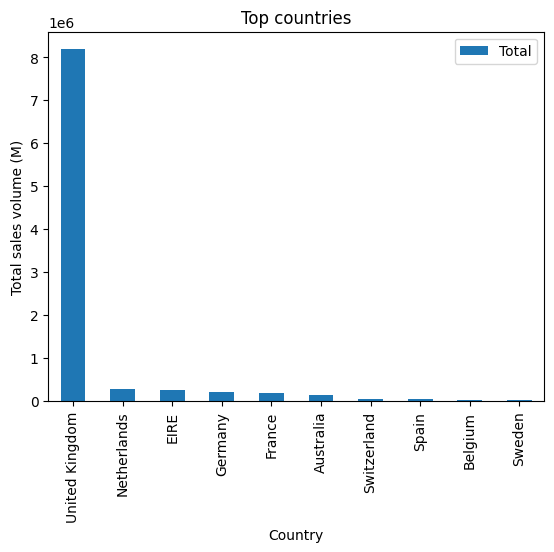

In [221]:
top10_countries = df.loc[:, ['Country', 'Total']].groupby(by='Country').sum().sort_values(by='Total', ascending=False).head(10)
top10_countries.plot.bar(y='Total',
                       title='Top countries',
                       ylabel='Total sales volume (M)')

# 9. Unique customers

<Axes: title={'center': 'Unique customers'}, xlabel='Year-Month'>

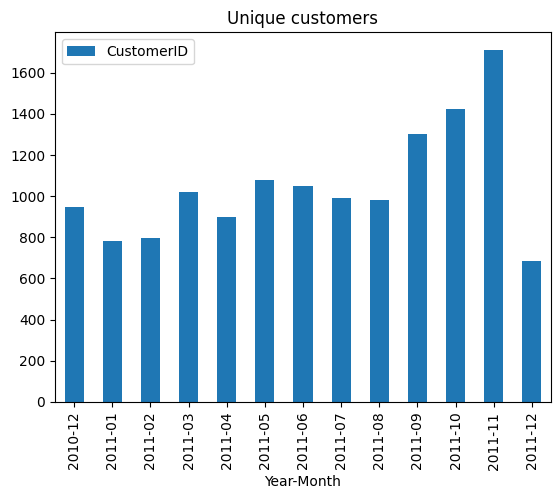

In [176]:
unique_customers = df[['CustomerID', 'Year-Month']].groupby(by='Year-Month').nunique()
unique_customers.plot.bar(title='Unique customers')

# 10. Time of day

<Axes: xlabel='InvoiceDate'>

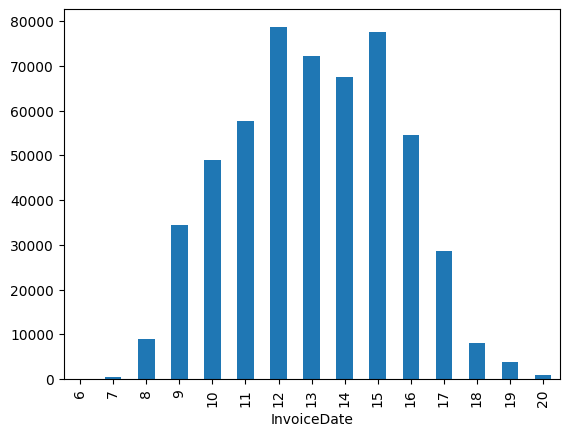

In [190]:
time_of_day = df['InvoiceDate'].dt.hour
time_of_day.value_counts().sort_index().plot.bar()

# Top products

In [274]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Total,Year-Month,DayOfWeek,DayOfMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,15.30,2010-12,2,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,2010-12,2,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,22.00,2010-12,2,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,2010-12,2,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,2010-12,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,10.20,2011-12,4,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60,2011-12,4,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60,2011-12,4,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60,2011-12,4,9


<Axes: title={'center': 'Top 10 products'}, xlabel='Sales', ylabel='Description'>

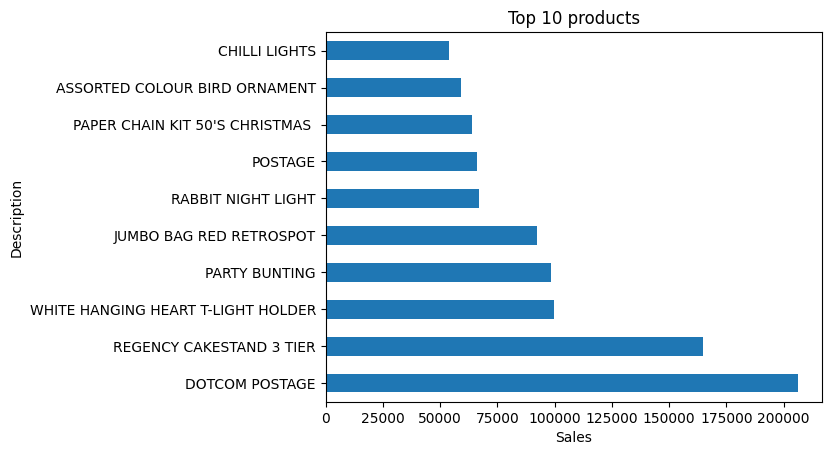

In [287]:
top_products = df.loc[:, ['Description', 'Total']].groupby('Description').sum()['Total'].sort_values(ascending=False)
top_products[:10].plot.barh(title='Top 10 products',
                             xlabel='Sales')